## DCT

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

In [63]:
# Step 1: Load and convert image to grayscale
img1 = cv2.imread('WhatsApp Image 2025-05-06 at 12.28.43 AM.jpeg', cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1, (256, 256))  # for simplicity

In [64]:
img2 = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.resize(img2, (256, 256))  # for simplicity

In [65]:
# Step 2: Define block size and quantization matrix
block_size = 8
Q = np.ones((8, 8)) * 32  # Simplified quantization matrix

In [66]:
# Step 3: Function to apply DCT blockwise
def apply_dct(img):
    h, w = img.shape
    dct_blocks = np.zeros_like(img, dtype=np.float32)
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = img[i:i+block_size, j:j+block_size]
            dct_blocks[i:i+block_size, j:j+block_size] = dct(dct(block.T, norm='ortho').T, norm='ortho')
    return dct_blocks

In [67]:
# Step 4: Quantization
def quantize(blocks, Q):
    h, w = blocks.shape
    quantized = np.zeros_like(blocks)
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = blocks[i:i+block_size, j:j+block_size]
            quantized[i:i+block_size, j:j+block_size] = np.round(block / Q)
    return quantized

In [68]:
# Step 5: Inverse Quantization and IDCT
def decompress(quantized_blocks, Q):
    h, w = quantized_blocks.shape
    recovered = np.zeros_like(quantized_blocks)
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = quantized_blocks[i:i+block_size, j:j+block_size] * Q
            recovered[i:i+block_size, j:j+block_size] = idct(idct(block.T, norm='ortho').T, norm='ortho')
    return np.clip(recovered, 0, 255)

In [69]:
# Execute compression and decompression iamge 1
dct_blocks = apply_dct(img1)
quantized = quantize(dct_blocks, Q)
dct_reconstructed1 = decompress(quantized, Q).astype(np.uint8)

In [70]:
# Execute compression and decompression iamge 2
dct_blocks = apply_dct(img2)
quantized = quantize(dct_blocks, Q)
dct_reconstructed2 = decompress(quantized, Q).astype(np.uint8)

In [71]:
from google.colab.patches import cv2_imshow

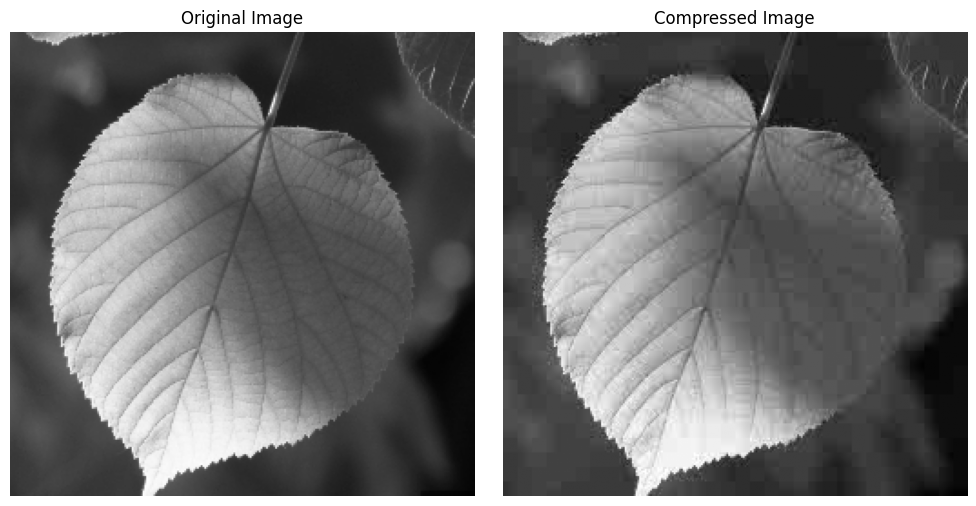

In [72]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img1, cmap='gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(dct_reconstructed1, cmap='gray')
axs[1].set_title("Compressed Image")
axs[1].axis('off')

plt.tight_layout()
plt.show()

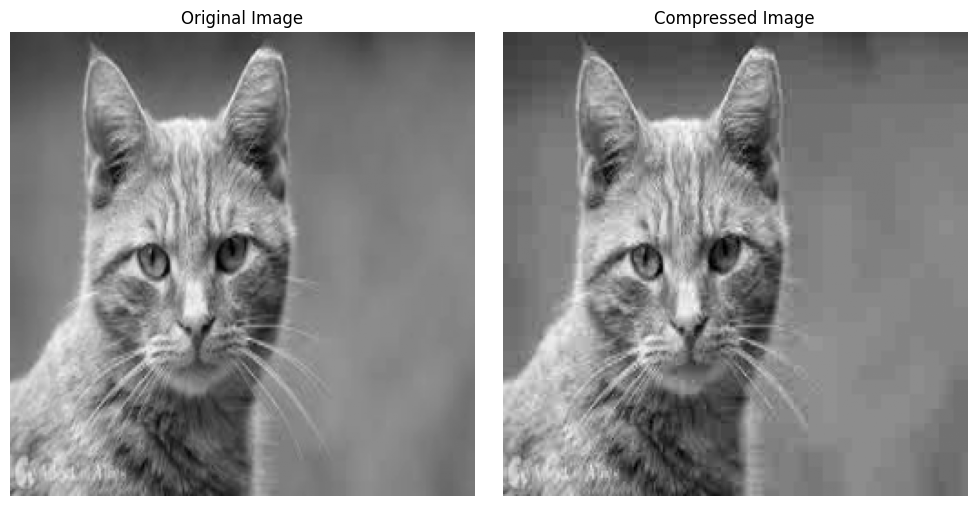

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img2, cmap='gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(dct_reconstructed2, cmap='gray')
axs[1].set_title("Compressed Image")
axs[1].axis('off')

plt.tight_layout()
plt.show()

# DWT

In [51]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 42.1 MB/s eta 0:00:00


In [53]:
import pywt

In [54]:
# Perform 2D DWT using Haar wavelet image1
coeffs1 = pywt.dwt2(img1, 'haar')
cA_1, (cH_1, cV_1, cD_1) = coeffs1  # Approximation and detail coefficients


In [55]:
# Compression: Zero out detail coefficients (for higher compression)
cH_1.fill(0)
cV_1.fill(0)
cD_1.fill(0)

In [56]:
dwt_reconstructed1 = pywt.idwt2((cA_1, (cH_1, cV_1, cD_1)), 'haar')
dwt_reconstructed1 = np.clip(dwt_reconstructed1, 0, 255).astype(np.uint8)

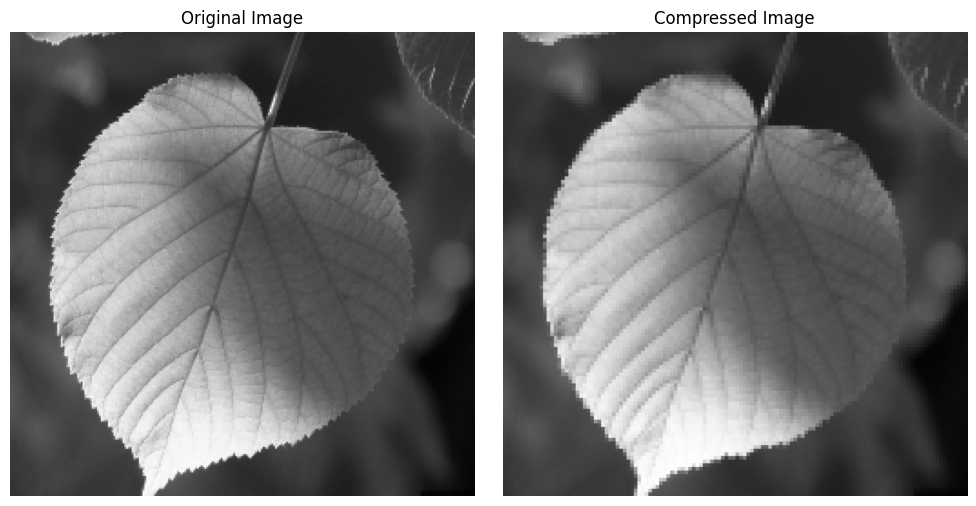

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img1, cmap='gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(dwt_reconstructed1, cmap='gray')
axs[1].set_title("Compressed Image")
axs[1].axis('off')

plt.tight_layout()
plt.show()

In [74]:
# Perform 2D DWT using Haar wavelet image2
coeffs2 = pywt.dwt2(img2, 'haar')
cA_2, (cH_2, cV_2, cD_2) = coeffs2  # Approximation and detail coefficients

In [75]:
# Compression: Zero out detail coefficients (for higher compression)
cH_2.fill(0)
cV_2.fill(0)
cD_2.fill(0)

In [78]:
dwt_reconstructed2 = pywt.idwt2((cA_2, (cH_2, cV_2, cD_2)), 'haar')
dwt_reconstructed2 = np.clip(dwt_reconstructed2, 0, 255).astype(np.uint8)

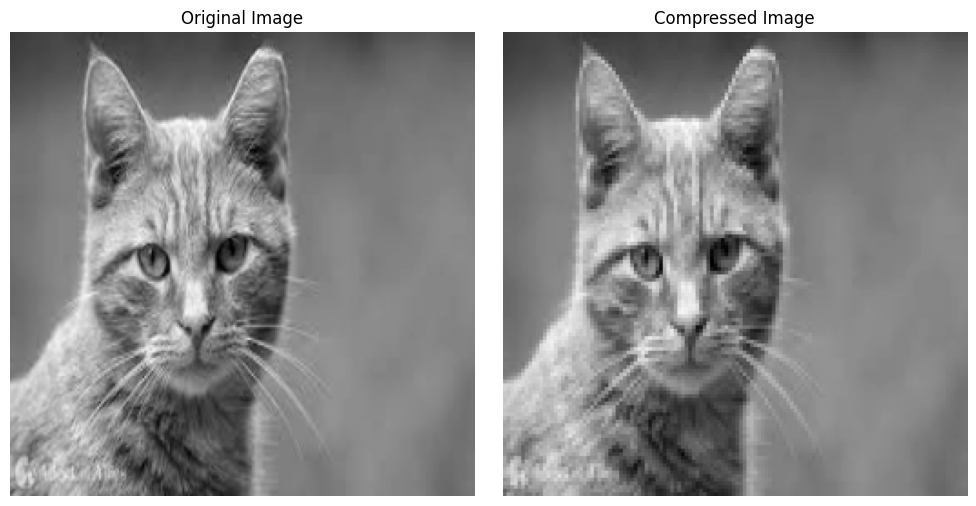

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img2, cmap='gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(dwt_reconstructed2, cmap='gray')
axs[1].set_title("Compressed Image")
axs[1].axis('off')

plt.tight_layout()
plt.show()

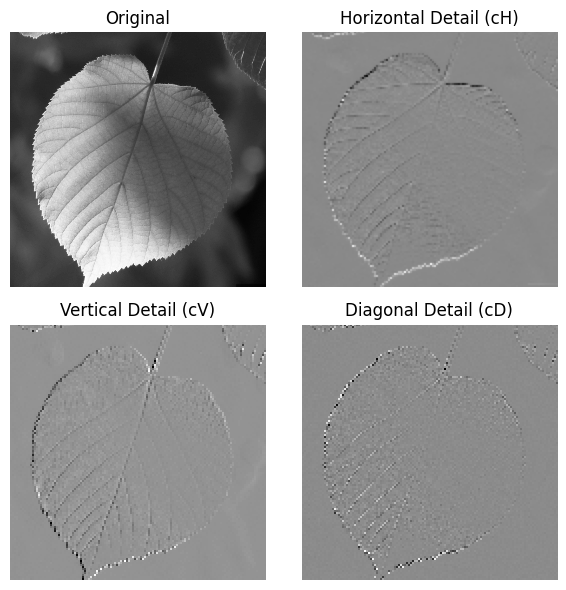

In [83]:
import cv2
import pywt
import matplotlib.pyplot as plt

if len(img1.shape) == 3:
    img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

coeffs = pywt.dwt2(img1, 'haar')
cA, (cH, cV, cD) = coeffs

# Normalize detail coefficients for better visualization
def normalize(img):
    img = img - img.min()
    img = img / img.max()
    return img

# Plot
plt.figure(figsize=(6, 6))

plt.subplot(2, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(normalize(cH), cmap='gray')
plt.title("Horizontal Detail (cH)")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(normalize(cV), cmap='gray')
plt.title("Vertical Detail (cV)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(normalize(cD), cmap='gray')
plt.title("Diagonal Detail (cD)")
plt.axis('off')

plt.tight_layout()
plt.show()


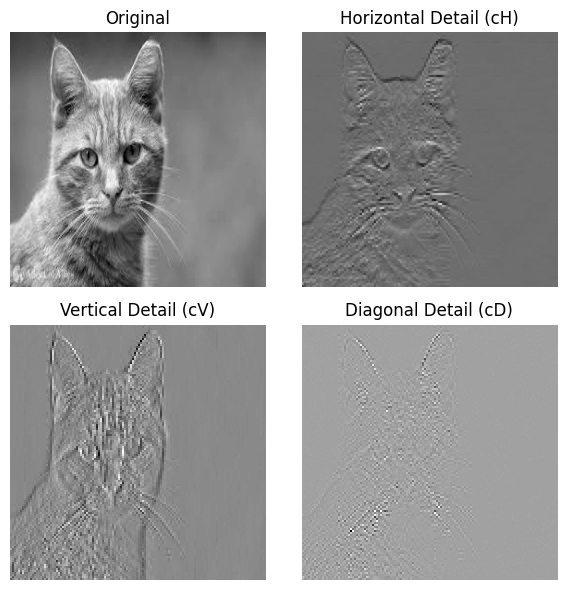

In [84]:
if len(img2.shape) == 3:
    img = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

coeffs = pywt.dwt2(img2, 'haar')
cA, (cH, cV, cD) = coeffs

# Normalize detail coefficients for better visualization
def normalize(img):
    img = img - img.min()
    img = img / img.max()
    return img

# Plot
plt.figure(figsize=(6, 6))

plt.subplot(2, 2, 1)
plt.imshow(img2, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(normalize(cH), cmap='gray')
plt.title("Horizontal Detail (cH)")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(normalize(cV), cmap='gray')
plt.title("Vertical Detail (cV)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(normalize(cD), cmap='gray')
plt.title("Diagonal Detail (cD)")
plt.axis('off')

plt.tight_layout()
plt.show()

## Level 2 decomposition

#### Image1

In [85]:
coeffs_l2 = pywt.wavedec2(img1, wavelet='haar', level=2)
cA2, (cH2, cV2, cD2), (cH1, cV1, cD1) = coeffs_l2

In [86]:
# Visualization
titles = ['Approximation Level 2', 'Horizontal Detail Level 2', 'Vertical Detail Level 2', 'Diagonal Detail Level 2',
          'Horizontal Detail Level 1', 'Vertical Detail Level 1', 'Diagonal Detail Level 1']
images = [cA2, cH2, cV2, cD2, cH1, cV1, cD1]

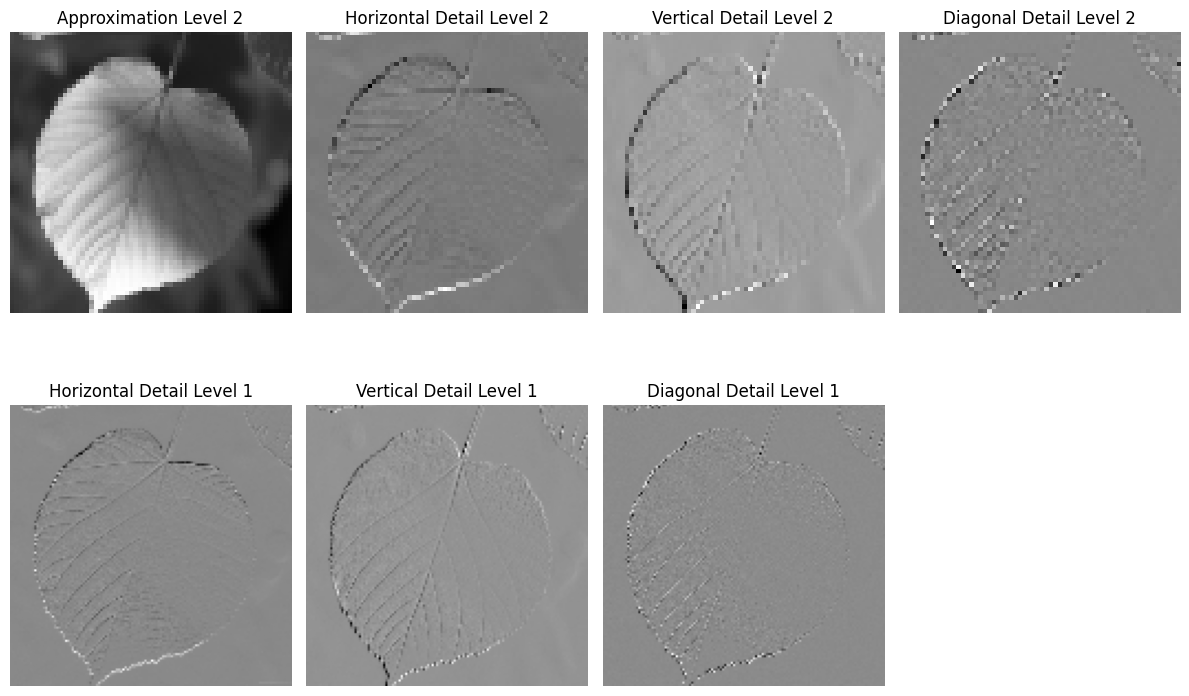

In [87]:
plt.figure(figsize=(12, 8))
for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(2, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()

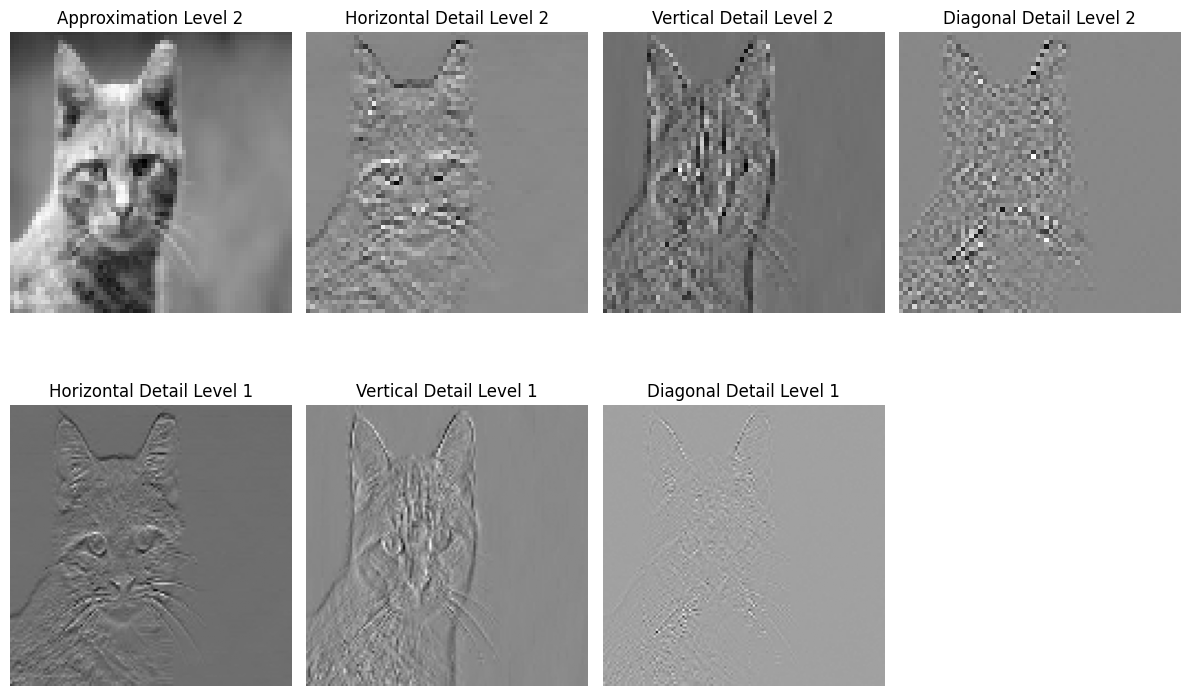

In [88]:
coeffs_l2 = pywt.wavedec2(img2, wavelet='haar', level=2)
cA2, (cH2, cV2, cD2), (cH1, cV1, cD1) = coeffs_l2
# Visualization
titles = ['Approximation Level 2', 'Horizontal Detail Level 2', 'Vertical Detail Level 2', 'Diagonal Detail Level 2',
          'Horizontal Detail Level 1', 'Vertical Detail Level 1', 'Diagonal Detail Level 1']
images = [cA2, cH2, cV2, cD2, cH1, cV1, cD1]

plt.figure(figsize=(12, 8))
for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(2, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()